This script performs two tasks 

## 1. Plotting Training Curves for Neural Network Experiments
Plot training curves from different experiments

## 2. Visualizing Neural Network Architectures with torchview
Loads and initializes any neural network


In [1]:
import sys
import os
from warnings import warn
import pandas as pd
from torch.utils.data import DataLoader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/home/vgarcia/notebooks')

from models_functions import *
from experiments_functions import *
from models_NN import *

In [11]:
basepath = "/home/vgarcia/experiments/NN_annual/"

# Training curves

Plot results from training experiments

In [12]:
def concatenate_csv_from_folders(folder_paths):
    """
    Search and concatenate all CSV files from the given folders.

    Parameters:
        folder_paths (list of str): List of paths to folders to search for CSV files.
        output_path (str, optional): Path to save the concatenated CSV file. If None, the result is not saved.

    Returns:
        pd.DataFrame: Concatenated DataFrame from all CSV files.
    """
    all_dfs = []

    for folder in folder_paths:
        if not os.path.isdir(folder):
            print(f"Warning: Folder not found - {folder}")
            continue

        for file_name in os.listdir(folder):
            if file_name.endswith('.csv'):
                full_path = os.path.join(folder, file_name)
                try:
                    df = pd.read_csv(full_path)
                    all_dfs.append(df)
                except Exception as e:
                    print(f"Error reading {full_path}: {e}")

    if not all_dfs:
        print("No CSV files found.")
        return None

    concatenated_df = pd.concat(all_dfs, ignore_index=True)

    return concatenated_df

# folders = ['SmallUNet_era5', "SmallUNet_Hist", "SmallUNet_Hist_subset", "SmallUNet_All", "SmallUNet_All_subset"]  # Replace with your actual folder paths
folders = ['SmallUNet_Hist', "UNet_Hist", "UNetSkip_Hist"]  # Replace with your actual folder paths
folder_path = [basepath + folder for folder in folders]
training_sizes_df = concatenate_csv_from_folders(folder_path)

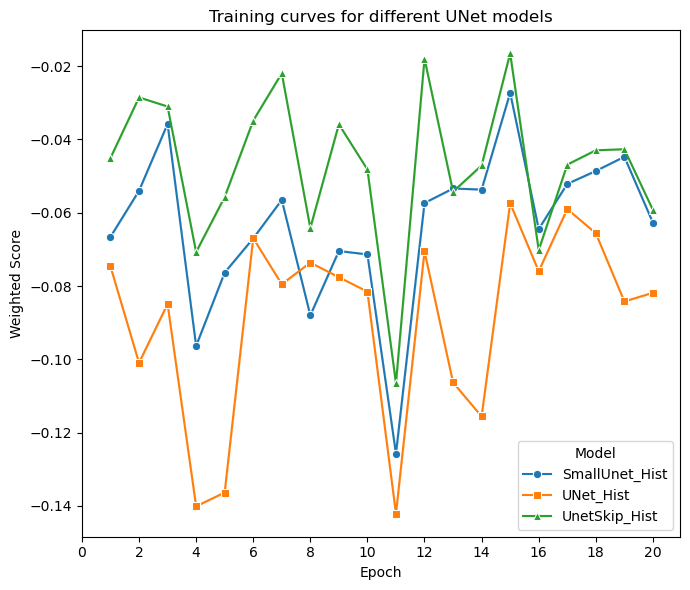

In [14]:
training_sizes_df['epoch'] = training_sizes_df['epoch'].astype(int)

# Filter data to only include epochs ≤ 20
filtered_df = training_sizes_df[training_sizes_df['epoch'] <= 20]

# Define unique markers for each experiment
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>']  # Add more if needed
experiments = filtered_df['experiment'].unique()
marker_dict = {exp: markers[i % len(markers)] for i, exp in enumerate(experiments)}

# Create a single plot
fig, ax = plt.subplots(figsize=(7, 6))

# Plot each experiment with a unique marker
for exp in experiments:
    data = filtered_df[filtered_df['experiment'] == exp]
    sns.lineplot(data=data, x='epoch', y='score', label=exp, marker=marker_dict[exp], ax=ax)

# Customize plot
ax.set_title('Training curves for different UNet models')
ax.set_xlabel('Epoch')
ax.set_ylabel('Weighted Score')
ax.set_xticks(range(0, 21, 2))
ax.legend(title='Model')
ax.grid(False)

plt.tight_layout()
plt.show()


# Plot architectures

In [13]:
import sys
import os
from warnings import warn
import pandas as pd
from torch.utils.data import DataLoader
from datetime import datetime
from torchview import draw_graph

In [ ]:
out_name = "UNet_Skip"
basepath = "/home/vgarcia/experiments/plots/NN/"

model = UNet()
x_maps = torch.randn(1, 12, 19, 16)  # dummy input maps
x_nino = torch.randn(1, 4)           # dummy ENSO index

# Create the computation graph with a descriptive title
graph = draw_graph(
    model,
    input_data=(x_maps, x_nino),
    expand_nested=True,
)

# Set a visible title manually using Graphviz attributes
graph.visual_graph.attr(label=out_name, labelloc='t', fontsize='20')

# Save the graph as an image
graph.visual_graph.render(filename=basepath + out_name, format="png", cleanup=True)

'/home/vgarcia/experiments/plots/NNUNet_Skip.png'

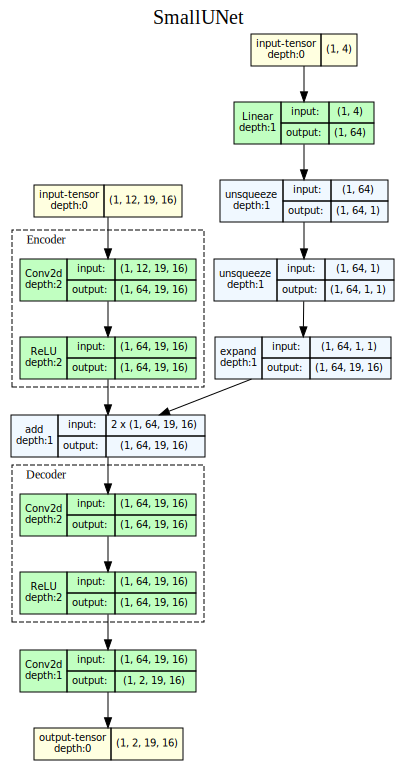

In [19]:
name = "SmallUNet"
model = SmallUNet()

x_maps = torch.randn(1, 12, 19, 16)  # dummy input maps
x_nino = torch.randn(1, 4)           # dummy ENSO index

from torchview import draw_graph

graph = draw_graph(
    model,
    input_data=(x_maps, x_nino),
    expand_nested=True,
    save_graph=False,
    graph_name=name
)

# Add title to the graph
graph.visual_graph.attr(label=name, labelloc='t', fontsize='20')

# Display inside notebook
display(graph.visual_graph)
